In [165]:
# load packages
import pandas as pd
import plotly
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [374]:
nasa = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW9.parquet')

In [178]:
nasa.head()

Source Chemistry Charge_Type  Cell  Step         Step_Type  Time  Voltage  \
0  NASA RW      None        None   9.0   0.0  reference charge   0.0    3.838   
1  NASA RW      None        None   9.0   0.0  reference charge  10.0    3.865   
2  NASA RW      None        None   9.0   0.0  reference charge  20.0    3.878   
3  NASA RW      None        None   9.0   0.0  reference charge  30.0    3.888   
4  NASA RW      None        None   9.0   0.0  reference charge  40.0    3.895   

   Instantaneous Capacity  Temperature  Current  Step Time  Reference Capacity  
0                0.000000     24.38530   -2.007        0.0         7551.064596  
1               -5.565278     24.38530   -2.000       10.0         7551.064596  
2              -11.120833     24.29163   -2.000       20.0         7551.064596  
3              -16.676389     24.24480   -2.000       30.0         7551.064596  
4              -22.231944     24.26041   -2.000       40.0         7551.064596

In [283]:
nasa.columns

Index(['Source', 'Chemistry', 'Charge_Type', 'Cell', 'Step', 'Step_Type',
       'Time', 'Voltage', 'Instantaneous Capacity', 'Temperature', 'Current',
       'Step Time', 'Reference Capacity'],
      dtype='object')

In [352]:
nasa['Cell'].unique()

array([9.])

In [285]:
nasa['Step_Type'].unique()

array(['reference charge', 'reference discharge', 'pulsed load (rest)',
       'pulsed load (discharge)', 'rest (random walk)',
       'discharge (random walk)', 'charge (random walk)',
       'pulsed charge (rest)', 'pulsed charge (charge)',
       'rest prior low current discharge',
       'low current discharge at 0.04A',
       'rest post low current discharge', 'rest post reference charge',
       'rest post reference discharge', 'rest post pulsed load or charge'],
      dtype=object)

In [375]:
# looking to see how the rest steps look
nasa = nasa[(nasa['Step_Type'] == 'rest post low current discharge')]

In [363]:
df_cell_9 = nasa[nasa['Cell'] == 9]

In [376]:
nasa['Step_Time'] = nasa.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa[nasa['Cell'] == 9] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles # maybe edit
if len(cycle_numbers) < 1:
    raise ValueError("Not enough unique cycles to select 1 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"voltage - step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"capacity - step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

In [377]:
filtered_df['Step'].unique() # rest post low current discharge

array([37627., 92434.])

In [373]:
filtered_df['Step'].unique() # rest post reference discharge

array([ 37631.,  37635.,  40658.,  40662.,  43681.,  43685.,  46708.,
        46712.,  49729.,  49733.,  52754.,  52758.,  55775.,  55779.,
        58800.,  58804.,  61821.,  61825.,  64846.,  64850.,  67865.,
        67869.,  70890.,  70894.,  73909.,  73913.,  76934.,  76938.,
        79953.,  79957.,  82976.,  82980.,  85995.,  85999.,  89018.,
        89022.,  92037.,  92041.,  92438.,  92442.,  95461.,  95465.,
        98478.,  98482., 101501., 101505., 104516., 104520., 107537.,
       107541., 110552., 110556., 113573., 113577.])

In [369]:
filtered_df['Step'].unique() # rest post pulsed load or charge

array([ 37654.,  40677.,  43704.,  46725.,  49750.,  52771.,  55796.,
        58817.,  61842.,  64861.,  67886.,  70905.,  73930.,  76949.,
        79972.,  82991.,  86014.,  89033.,  92056.,  92457.,  95474.,
        98497., 101512., 104533., 107548., 110569.])

In [365]:
filtered_df['Step'].unique() # pulsed load (rest)
# steps are unique of course so i can combine them and expect no overlap

array([4.00000e+00, 6.00000e+00, 8.00000e+00, 1.00000e+01, 1.20000e+01,
       1.40000e+01, 1.60000e+01, 1.80000e+01, 2.00000e+01, 2.20000e+01,
       2.40000e+01, 2.60000e+01, 2.80000e+01, 6.06000e+03, 6.06200e+03,
       6.06400e+03, 6.06600e+03, 6.06800e+03, 6.07000e+03, 6.07200e+03,
       6.07400e+03, 6.07600e+03, 6.07800e+03, 6.08000e+03, 6.08200e+03,
       6.08400e+03, 1.21140e+04, 1.21160e+04, 1.21180e+04, 1.21200e+04,
       1.21220e+04, 1.21240e+04, 1.21260e+04, 1.21280e+04, 1.21300e+04,
       1.21320e+04, 1.21340e+04, 1.21360e+04, 1.81640e+04, 1.81660e+04,
       1.81680e+04, 1.81700e+04, 1.81720e+04, 1.81740e+04, 1.81760e+04,
       1.81780e+04, 1.81800e+04, 1.81820e+04, 1.81840e+04, 2.42120e+04,
       2.42140e+04, 2.42160e+04, 2.42180e+04, 2.42200e+04, 2.42220e+04,
       2.42240e+04, 2.42260e+04, 2.42280e+04, 2.42300e+04, 2.42320e+04,
       3.02580e+04, 3.02600e+04, 3.02620e+04, 3.02640e+04, 3.02660e+04,
       3.02680e+04, 3.02700e+04, 3.02720e+04, 3.02740e+04, 3.027

In [378]:
nasa = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW9.parquet')

In [380]:
rest_steps = [
    'rest post low current discharge',
    'rest post reference discharge',
    'rest post pulsed load or charge',
    'pulsed load (rest)'
]

# filter for the rest steps on interest 
nasa_filtered = nasa[nasa['Step_Type'].isin(rest_steps)]

print(nasa_filtered.head())

    Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
0  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46853.04   
1  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46854.04   
2  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46855.04   
3  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46856.04   
4  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46857.04   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
0    4.199                     0.0     22.99587      0.0        0.0   
1    4.199                     0.0     22.98026      0.0        1.0   
2    4.199                     0.0     22.98026      0.0        2.0   
3    4.199                     0.0     22.98026      0.0        3.0   
4    4.199                     0.0     22.98026      0.0        4.0   

   Reference Capacity  
0         7488.539512  
1         7488.539512  
2         7488.539512  
3       

In [358]:
nasa_filtered

Source Chemistry Charge_Type  Cell      Step  \
0    NASA RW      None        None   9.0       4.0   
1    NASA RW      None        None   9.0       4.0   
2    NASA RW      None        None   9.0       4.0   
3    NASA RW      None        None   9.0       4.0   
4    NASA RW      None        None   9.0       4.0   
..       ...       ...         ...   ...       ...   
716  NASA RW      None        None   9.0  113577.0   
717  NASA RW      None        None   9.0  113577.0   
718  NASA RW      None        None   9.0  113577.0   
719  NASA RW      None        None   9.0  113577.0   
720  NASA RW      None        None   9.0  113577.0   

                         Step_Type         Time  Voltage  \
0               pulsed load (rest)     46853.04    4.199   
1               pulsed load (rest)     46854.04    4.199   
2               pulsed load (rest)     46855.04    4.199   
3               pulsed load (rest)     46856.04    4.199   
4               pulsed load (rest)     46857.04    4.199   
..                             ...          ...      ...   
716  rest post reference discharge  12713334.60    3.801   
717  rest post reference discharge  12713344.60    3.801   
718  rest post reference discharge  12713354.60    3.801   
719  rest post reference discharge  12713364.60    3.801   
720  rest post reference discharge  12713374.59    3.801   

     Instantaneous Capacity  Temperature  Current  Step Time  \
0                  0.000000     22.99587      0.0       0.00   
1                  0.000000     22.98026      0.0       1.00   
2                  0.000000     22.98026      0.0       2.00   
3                  0.000000     22.98026      0.0       3.00   
4                  0.000000     22.98026      0.0       4.00   
..                      ...          ...      ...        ...   
716             -348.940168     33.31358      0.0    7160.00   
717             -348.940168     33.31358      0.0    7170.00   
718             -348.940168     33.29812      0.0    7180.00   
719             -348.940168     33.29812      0.0    7190.00   
720             -348.940168     33.29812      0.0    7199.99   

     Reference Capacity  
0           7488.539512  
1           7488.539512  
2           7488.539512  
3           7488.539512  
4           7488.539512  
..                  ...  
716         2764.462952  
717         2764.462952  
718         2764.462952  
719         2764.462952  
720         2764.462952  

[290184 rows x 13 columns]

In [382]:
nasa_filtered['Step'].is_monotonic_increasing # in order after combining 

True

C:\Users\Worm\AppData\Local\Temp\ipykernel_26352\2525753624.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



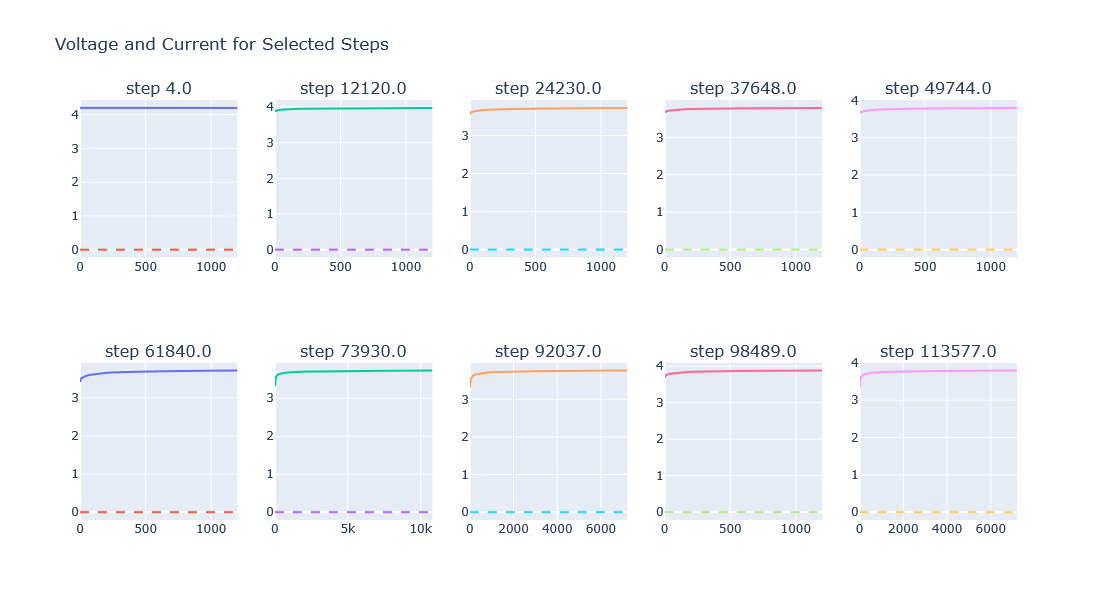

In [383]:
###########################
# Plotting Combined Rest #
###########################

nasa_filtered['Step_Time'] = nasa_filtered.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa_filtered[nasa_filtered['Cell'] == 9] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles # maybe edit
if len(cycle_numbers) < 1:
    raise ValueError("Not enough unique cycles to select 1 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"voltage - step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"capacity - step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

In [ ]:
# back to filtered_df
# contains all the rest interested in

In [385]:
filtered_df[filtered_df['Step'] == 113577][['Voltage', 'Current']].loc[10:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 113577]['Current'].diff().loc[10:].plot(marker = ".") # current stays 0 for all of these
# but voltage should increase
# so that's how we will filter for VR within steps 

<Axes: >

In [386]:
# function to filter for VR within steps
def filter_for_VR(step_data, voltage_increase_thresh=1e-3, current_thresh=1e-3):
    step_data = step_data.copy()
    
    # to see if voltage is increasing between rows compared to start
    voltage_start = step_data['Voltage'].iloc[0]
    step_data['voltage_change'] = step_data['Voltage'] - voltage_start
    
    # filter for rows where voltage increases and current is basically 0
    filtered_rows = step_data[(step_data['voltage_change'] >= voltage_increase_thresh) &
                                (step_data['Current'].abs() <= current_thresh)]
    
    return filtered_rows

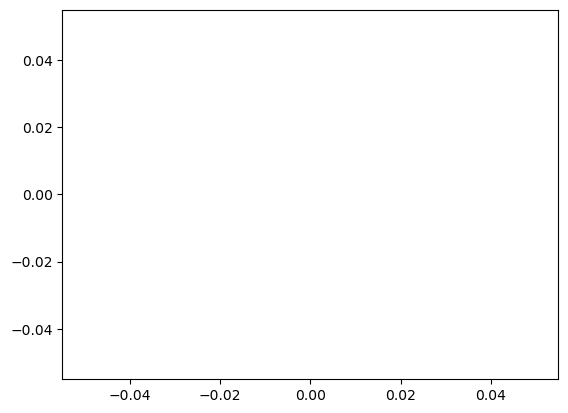

In [387]:
filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 4])['Voltage'].plot(marker = ".")
# i expected this because you can see that step 4 does not experience VR

In [388]:
another_filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 92037])['Voltage'].plot(marker = ".")
# retains this step because it experiences VR

In [ ]:
# i'll have to go back and combine cells into nasa and apply steps but this is just EDA to see that everything works

In [389]:
# let's look at another RW nasa cell -- 10
nasa = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW10.parquet')

In [313]:
nasa['Cell'].unique()

array([10], dtype=int64)

In [314]:
nasa['Step_Type'].unique()

array(['reference charge', 'reference discharge', 'pulsed load (rest)',
       'pulsed load (discharge)', 'rest (random walk)',
       'charge (random walk)', 'discharge (random walk)',
       'pulsed charge (rest)', 'pulsed charge (charge)',
       'rest prior low current discharge',
       'low current discharge at 0.04A',
       'rest post low current discharge', 'rest post reference charge',
       'rest post reference discharge', 'rest post pulsed load or charge'],
      dtype=object)

In [390]:
# filtering to see that they look the same
nasa = nasa[(nasa['Step_Type'] == 'rest post pulsed load or charge')]

In [391]:
df_cell_10 = nasa[nasa['Cell'] == 10]

In [392]:
nasa['Step_Time'] = nasa.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa[nasa['Cell'] == 10] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles # maybe edit
if len(cycle_numbers) < 1:
    raise ValueError("Not enough unique cycles to select 1 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"voltage - step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"capacity - step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

In [318]:
filtered_df['Step'].unique() # pulsed load (rest)

array([4.00000e+00, 6.00000e+00, 8.00000e+00, 1.00000e+01, 1.20000e+01,
       1.40000e+01, 1.60000e+01, 1.80000e+01, 2.00000e+01, 2.20000e+01,
       2.40000e+01, 2.60000e+01, 2.80000e+01, 6.06000e+03, 6.06200e+03,
       6.06400e+03, 6.06600e+03, 6.06800e+03, 6.07000e+03, 6.07200e+03,
       6.07400e+03, 6.07600e+03, 6.07800e+03, 6.08000e+03, 6.08200e+03,
       6.08400e+03, 1.21140e+04, 1.21160e+04, 1.21180e+04, 1.21200e+04,
       1.21220e+04, 1.21240e+04, 1.21260e+04, 1.21280e+04, 1.21300e+04,
       1.21320e+04, 1.21340e+04, 1.21360e+04, 1.81640e+04, 1.81660e+04,
       1.81680e+04, 1.81700e+04, 1.81720e+04, 1.81740e+04, 1.81760e+04,
       1.81780e+04, 1.81800e+04, 1.81820e+04, 1.81840e+04, 2.42120e+04,
       2.42140e+04, 2.42160e+04, 2.42180e+04, 2.42200e+04, 2.42220e+04,
       2.42240e+04, 2.42260e+04, 2.42280e+04, 2.42300e+04, 2.42320e+04,
       3.02580e+04, 3.02600e+04, 3.02620e+04, 3.02640e+04, 3.02660e+04,
       3.02680e+04, 3.02700e+04, 3.02720e+04, 3.02740e+04, 3.027

In [323]:
filtered_df['Step'].unique() # rest post low current discharge

array([37201., 89671.])

In [328]:
filtered_df['Step'].unique() # rest post reference discharge

array([ 37205.,  37209.,  40234.,  40238.,  43257.,  43261.,  46284.,
        46288.,  49305.,  49309.,  52332.,  52336.,  55353.,  55357.,
        58378.,  58382.,  61399.,  61403.,  64424.,  64428.,  67445.,
        67449.,  70470.,  70474.,  73491.,  73495.,  76516.,  76520.,
        79535.,  79539.,  82560.,  82564.,  85579.,  85583.,  88604.,
        88608.,  89675.,  89679.,  92700.,  92704.,  95719.,  95723.,
        98742.,  98746., 101759., 101763., 104782., 104786., 107797.,
       107801.])

In [333]:
filtered_df['Step'].unique() # rest post pulsed load or charge

array([ 37230.,  40253.,  43280.,  46301.,  49328.,  52349.,  55374.,
        58395.,  61420.,  64441.,  67466.,  70487.,  73512.,  76531.,
        79556.,  82575.,  85600.,  88619.,  89696.,  92715.,  95738.,
        98755., 101778., 104793., 107814.])

In [393]:
nasa = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW10.parquet')

In [394]:
rest_steps = [
    'rest post low current discharge',
    'rest post reference discharge',
    'rest post pulsed load or charge',
    'pulsed load (rest)'
]

# filter for the rest steps on interest 
nasa_filtered = nasa[nasa['Step_Type'].isin(rest_steps)]

print(nasa_filtered.head())

    Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
0  NASA RW      None        None    10   4.0  pulsed load (rest)  37620.36   
1  NASA RW      None        None    10   4.0  pulsed load (rest)  37621.36   
2  NASA RW      None        None    10   4.0  pulsed load (rest)  37622.36   
3  NASA RW      None        None    10   4.0  pulsed load (rest)  37623.36   
4  NASA RW      None        None    10   4.0  pulsed load (rest)  37624.36   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
0    4.199                     0.0      22.9858      0.0        0.0   
1    4.199                     0.0      22.9858      0.0        1.0   
2    4.199                     0.0      22.9858      0.0        2.0   
3    4.199                     0.0      22.9858      0.0        3.0   
4    4.199                     0.0      22.9858      0.0        4.0   

   Reference Capacity  
0         7489.834745  
1         7489.834745  
2         7489.834745  
3       

In [395]:
nasa_filtered['Step'].is_monotonic_increasing # in order after combining 

True

C:\Users\Worm\AppData\Local\Temp\ipykernel_26352\3526165038.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



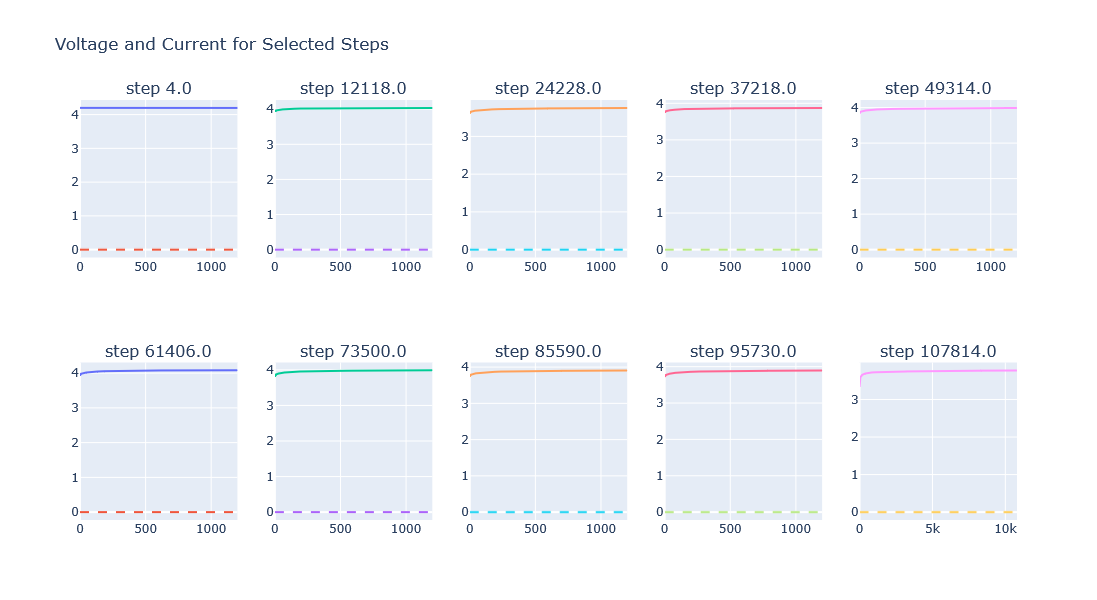

In [397]:
###########################
# Plotting Combined Rest #
###########################

nasa_filtered['Step_Time'] = nasa_filtered.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa_filtered[nasa_filtered['Cell'] == 10] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles # maybe edit
if len(cycle_numbers) < 1:
    raise ValueError("Not enough unique cycles to select 1 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"voltage - step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"capacity - step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

<Axes: >

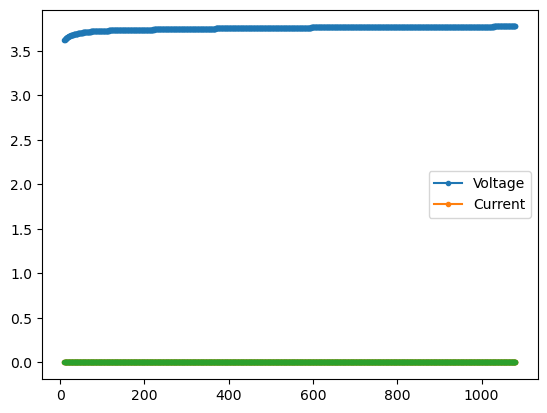

In [398]:
# goes back to filtered_df
filtered_df[filtered_df['Step'] == 107814][['Voltage', 'Current']].loc[10:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 107814]['Current'].diff().loc[10:].plot(marker = ".") # current stays 0 for all of these
# but voltage should increase
# so that's how we will filter for VR within steps 

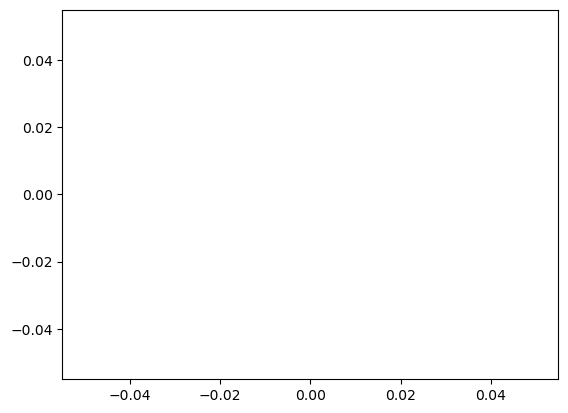

In [399]:
filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 4])['Voltage'].plot(marker = ".")
# i expected this because you can see that step 4 does not experience VR

In [400]:
another_filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 85590])['Voltage'].plot(marker = ".")
# retains this step because it experiences VR

In [403]:
# need to look at RW cells 11, 12 # start here ################
# then combine them all and filter for VR steps

nasa = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW11.parquet')

In [404]:
rest_steps = [
    'rest post low current discharge',
    'rest post reference discharge',
    'rest post pulsed load or charge',
    'pulsed load (rest)'
]

# filter for the rest steps on interest 
nasa_filtered = nasa[nasa['Step_Type'].isin(rest_steps)]

print(nasa_filtered.head())

    Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
0  NASA RW      None        None  11.0   4.0  pulsed load (rest)  41961.71   
1  NASA RW      None        None  11.0   4.0  pulsed load (rest)  41962.71   
2  NASA RW      None        None  11.0   4.0  pulsed load (rest)  41963.71   
3  NASA RW      None        None  11.0   4.0  pulsed load (rest)  41964.71   
4  NASA RW      None        None  11.0   4.0  pulsed load (rest)  41965.71   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
0    4.199                     0.0     19.88995      0.0        0.0   
1    4.199                     0.0     19.88995      0.0        1.0   
2    4.199                     0.0     19.88995      0.0        2.0   
3    4.199                     0.0     19.88995      0.0        3.0   
4    4.199                     0.0     19.88995      0.0        4.0   

   Reference Capacity  
0         7492.576044  
1         7492.576044  
2         7492.576044  
3       

In [405]:
nasa_filtered['Step'].is_monotonic_increasing # in order after combining 

True

In [406]:
###########################
# Plotting Combined Rest #
###########################

nasa_filtered['Step_Time'] = nasa_filtered.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa_filtered[nasa_filtered['Cell'] == 11] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles # maybe edit
if len(cycle_numbers) < 1:
    raise ValueError("Not enough unique cycles to select 1 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"voltage - step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"capacity - step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

C:\Users\Worm\AppData\Local\Temp\ipykernel_26352\3264622937.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

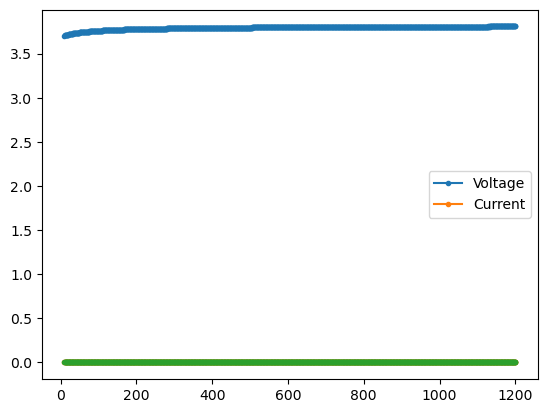

In [407]:
# goes back to filtered_df
filtered_df[filtered_df['Step'] == 84974][['Voltage', 'Current']].loc[10:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 84974]['Current'].diff().loc[10:].plot(marker = ".") # current stays 0 for all of these
# but voltage should increase
# so that's how we will filter for VR within steps 

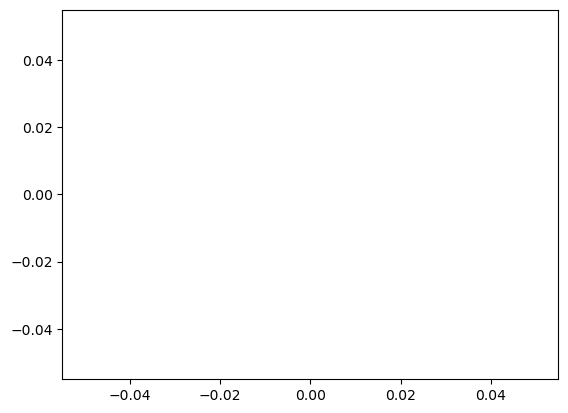

In [408]:
filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 4])['Voltage'].plot(marker = ".")
# i expected this because you can see that step 4 does not experience VR

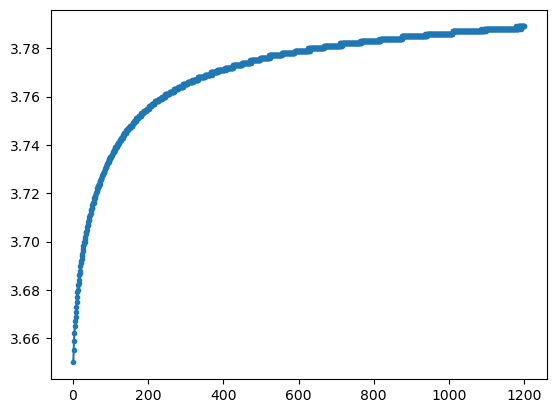

In [409]:
another_filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 94298])['Voltage'].plot(marker = ".")
# retains this step because it experiences VR

In [410]:
# cell 12 checking 
# then combine them all
nasa = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW12.parquet')

In [411]:
rest_steps = [
    'rest post low current discharge',
    'rest post reference discharge',
    'rest post pulsed load or charge',
    'pulsed load (rest)'
]

# filter for the rest steps on interest 
nasa_filtered = nasa[nasa['Step_Type'].isin(rest_steps)]

print(nasa_filtered.head())

    Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
0  NASA RW      None        None  12.0   4.0  pulsed load (rest)  48488.98   
1  NASA RW      None        None  12.0   4.0  pulsed load (rest)  48489.98   
2  NASA RW      None        None  12.0   4.0  pulsed load (rest)  48490.98   
3  NASA RW      None        None  12.0   4.0  pulsed load (rest)  48491.98   
4  NASA RW      None        None  12.0   4.0  pulsed load (rest)  48492.98   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
0    4.199                     0.0     20.09411      0.0        0.0   
1    4.199                     0.0     20.09411      0.0        1.0   
2    4.199                     0.0     20.10965      0.0        2.0   
3    4.199                     0.0     20.10965      0.0        3.0   
4    4.199                     0.0     20.10965      0.0        4.0   

   Reference Capacity  
0         7515.583553  
1         7515.583553  
2         7515.583553  
3       

In [412]:
nasa_filtered['Step'].is_monotonic_increasing # in order after combining 

True

C:\Users\Worm\AppData\Local\Temp\ipykernel_26352\3912692582.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



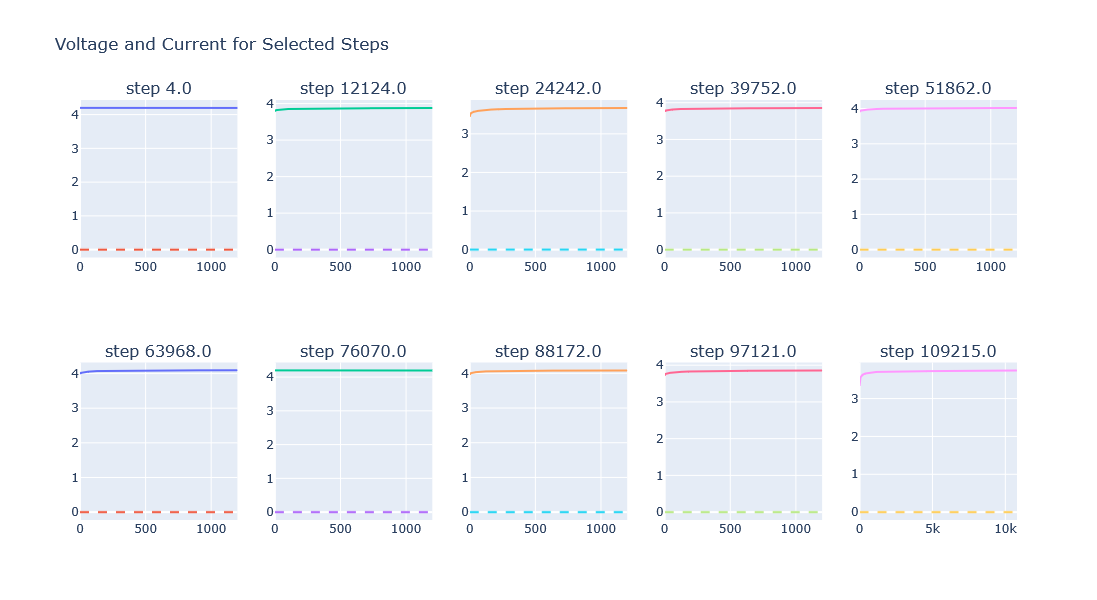

In [413]:
###########################
# Plotting Combined Rest #
###########################

nasa_filtered['Step_Time'] = nasa_filtered.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())

filtered_df = nasa_filtered[nasa_filtered['Cell'] == 12] ############## adjust here
# Ensure the 'Cycle' column is sorted and unique
cycle_numbers = np.sort(filtered_df['Step'].unique())

# Check if there are enough cycles # maybe edit
if len(cycle_numbers) < 1:
    raise ValueError("Not enough unique cycles to select 1 quantiles.")

# Calculate the quantile-based indices (0.1, 0.2, ..., 1.0 percentiles)
quantile_indices = (np.linspace(0, len(cycle_numbers) - 1, 10)).astype(int)

# Select the cycles corresponding to the quantile indices
selected_cycles = cycle_numbers[quantile_indices]

# Create a 2x5 subplot grid
fig = make_subplots(rows=2, cols=5, subplot_titles=[f"step {cycle}" for cycle in selected_cycles])

# Loop over each selected cycle to create a separate plot
for idx, cycle in enumerate(selected_cycles):
    # Filter data for the current cycle
    cycle_data = filtered_df[filtered_df['Step'] == cycle]
    
    # Determine the row and column for this subplot
    row = (idx // 5) + 1  # Rows: 1 or 2
    col = (idx % 5) + 1   # Columns: 1 to 5

     # Add the voltage trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Voltage'], 
                   mode='lines', name=f"voltage - step {cycle}"),
        row=row, col=col
    )

    # Add the instantaneous capacity trace
    fig.add_trace(
        go.Scatter(x=cycle_data['Step_Time'], y=cycle_data['Current'], 
                   mode='lines', name=f"capacity - step {cycle}", line=dict(dash='dash')),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=600, width=1000, 
    title_text='Voltage and Current for Selected Steps',
    showlegend=False
)

# Show the plot
fig.show()

In [414]:
# goes back to filtered_df
filtered_df[filtered_df['Step'] == 88172][['Voltage', 'Current']].loc[10:].plot(marker = ".")
filtered_df[filtered_df['Step'] == 88172]['Current'].diff().loc[10:].plot(marker = ".") # current stays 0 for all of these
# but voltage should increase
# so that's how we will filter for VR within steps 

<Axes: >

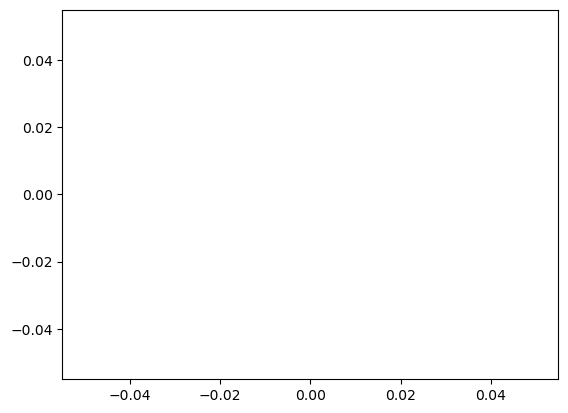

In [415]:
filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 4])['Voltage'].plot(marker = ".")
# i expected this because you can see that step 4 does not experience VR

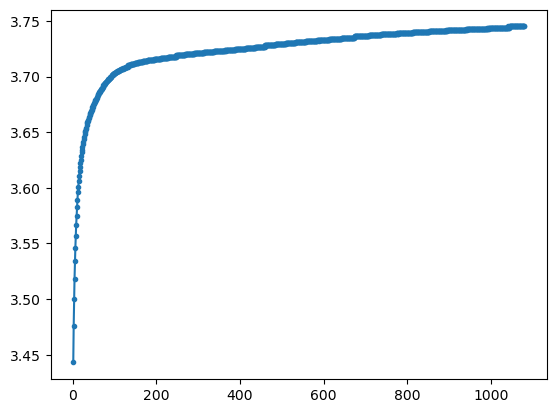

In [416]:
another_filtered_example = filter_for_VR(filtered_df[filtered_df['Step'] == 109215])['Voltage'].plot(marker = ".")
# retains this step because it experiences VR

In [1]:
# had to restart kernal because of memory issues so have to redefine function etc
# all are good now combining and filtering 
import pandas as pd

nasa9 = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW9.parquet')

In [2]:
nasa10 = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW10.parquet')

In [3]:
nasa11 = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW11.parquet')

In [4]:
nasa12 = pd.read_parquet('C:/Users/Worm/Downloads/PartialVRFolder/RW12.parquet')

In [9]:
import gc
gc.collect()

1440

In [5]:
# i can't combine into one because of memory issues so have to do some 
# things one by one
rest_steps = [
    'rest post low current discharge',
    'rest post reference discharge',
    'rest post pulsed load or charge',
    'pulsed load (rest)'
]

# filter for the rest steps on interest 
nasa9_filtered = nasa9[nasa9['Step_Type'].isin(rest_steps)]

print(nasa9_filtered.head())

    Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
0  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46853.04   
1  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46854.04   
2  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46855.04   
3  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46856.04   
4  NASA RW      None        None   9.0   4.0  pulsed load (rest)  46857.04   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
0    4.199                     0.0     22.99587      0.0        0.0   
1    4.199                     0.0     22.98026      0.0        1.0   
2    4.199                     0.0     22.98026      0.0        2.0   
3    4.199                     0.0     22.98026      0.0        3.0   
4    4.199                     0.0     22.98026      0.0        4.0   

   Reference Capacity  
0         7488.539512  
1         7488.539512  
2         7488.539512  
3       

In [6]:
# function to filter for VR within steps
def filter_for_VR(step_data, voltage_increase_thresh=1e-3, current_thresh=1e-3):
    step_data = step_data.copy()
    
    # to see if voltage is increasing between rows compared to start
    voltage_start = step_data['Voltage'].iloc[0]
    step_data['voltage_change'] = step_data['Voltage'] - voltage_start
    
    # filter for rows where voltage increases and current is basically 0
    filtered_rows = step_data[(step_data['voltage_change'] >= voltage_increase_thresh) &
                                (step_data['Current'].abs() <= current_thresh)]
    
    return filtered_rows

In [7]:
nasa10_filtered = nasa10[nasa10['Step_Type'].isin(rest_steps)]
nasa11_filtered = nasa11[nasa11['Step_Type'].isin(rest_steps)]
nasa12_filtered = nasa12[nasa12['Step_Type'].isin(rest_steps)]

In [10]:
# applying vr function to each 'Step' in the dataframe
nasa9_filtered = (
    nasa9_filtered.groupby('Step', group_keys=False)
    .apply(filter_for_VR)
)

nasa10_filtered = (
    nasa10_filtered.groupby('Step', group_keys=False)
    .apply(filter_for_VR)
)

nasa11_filtered = (
    nasa11_filtered.groupby('Step', group_keys=False)
    .apply(filter_for_VR)
)

nasa12_filtered = (
    nasa12_filtered.groupby('Step', group_keys=False)
    .apply(filter_for_VR)
)

C:\Users\Worm\AppData\Local\Temp\ipykernel_8844\1127561372.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(filter_for_VR)
C:\Users\Worm\AppData\Local\Temp\ipykernel_8844\1127561372.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(filter_for_VR)
C:\Users\Worm\AppData\Local\Temp\ipykernel_8844\1127561372.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. T

In [11]:
nasa9_filtered['Voltage'].min(), nasa9_filtered['Voltage'].min(), nasa9_filtered['Voltage'].min(), nasa9_filtered['Voltage'].min()

(3.214, 3.214, 3.214, 3.214)

In [22]:
nasa_df = pd.concat([nasa9_filtered, nasa10_filtered, nasa11_filtered, nasa12_filtered], axis = 0)
nasa_df.head()

Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
1  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48654.04   
2  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48655.04   
3  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48656.04   
4  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48657.04   
5  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48658.04   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
1    4.070              166.650865     23.77645      0.0        1.0   
2    4.072              166.650865     23.77645      0.0        2.0   
3    4.074              166.650865     23.77645      0.0        3.0   
4    4.075              166.650865     23.77645      0.0        4.0   
5    4.076              166.650865     23.77645      0.0        5.0   

   Reference Capacity  voltage_change  
1         7488.539512           0.008  
2         7488.539512           0.010  
3         7488.539512           0.012  
4         7488.539512           0.013  
5         7488.539512           0.014

In [23]:
nasa_df['Step_Time'] = nasa_df.groupby(['Cell','Step'])['Time'].transform(lambda x: x - x.min())
nasa_df.head()

Source Chemistry Charge_Type  Cell  Step           Step_Type      Time  \
1  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48654.04   
2  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48655.04   
3  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48656.04   
4  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48657.04   
5  NASA RW      None        None   9.0   6.0  pulsed load (rest)  48658.04   

   Voltage  Instantaneous Capacity  Temperature  Current  Step Time  \
1    4.070              166.650865     23.77645      0.0        1.0   
2    4.072              166.650865     23.77645      0.0        2.0   
3    4.074              166.650865     23.77645      0.0        3.0   
4    4.075              166.650865     23.77645      0.0        4.0   
5    4.076              166.650865     23.77645      0.0        5.0   

   Reference Capacity  voltage_change  Step_Time  
1         7488.539512           0.008        0.0  
2         7488.539512           0.010        1.0  
3         7488.539512           0.012        2.0  
4         7488.539512           0.013        3.0  
5         7488.539512           0.014        4.0

In [24]:
nasa_df.drop('Source', axis = 1, inplace = True)
nasa_df.drop('voltage_change', axis = 1, inplace = True)
nasa_df.drop('Step Time', axis = 1, inplace = True)

In [25]:
nasa_df.columns

Index(['Chemistry', 'Charge_Type', 'Cell', 'Step', 'Step_Type', 'Time',
       'Voltage', 'Instantaneous Capacity', 'Temperature', 'Current',
       'Reference Capacity', 'Step_Time'],
      dtype='object')

In [26]:
nasa_df = nasa_df[['Chemistry', 'Cell', 'Step', 'Step_Type', 'Time',
       'Voltage', 'Reference Capacity', 'Instantaneous Capacity',
       'Temperature','Current', 'Charge_Type', 'Step_Time']]

In [27]:
nasa_df.head()

Chemistry  Cell  Step           Step_Type      Time  Voltage  \
1      None   9.0   6.0  pulsed load (rest)  48654.04    4.070   
2      None   9.0   6.0  pulsed load (rest)  48655.04    4.072   
3      None   9.0   6.0  pulsed load (rest)  48656.04    4.074   
4      None   9.0   6.0  pulsed load (rest)  48657.04    4.075   
5      None   9.0   6.0  pulsed load (rest)  48658.04    4.076   

   Reference Capacity  Instantaneous Capacity  Temperature  Current  \
1         7488.539512              166.650865     23.77645      0.0   
2         7488.539512              166.650865     23.77645      0.0   
3         7488.539512              166.650865     23.77645      0.0   
4         7488.539512              166.650865     23.77645      0.0   
5         7488.539512              166.650865     23.77645      0.0   

  Charge_Type  Step_Time  
1        None        0.0  
2        None        1.0  
3        None        2.0  
4        None        3.0  
5        None        4.0

In [28]:
#nasa_df.to_csv('C:/Users/Worm/Downloads/PartialVRFolder/rw_nasa_rebound_data.csv')